Formating Jupyter notebook so that the font is easy to read. 
https://stackoverflow.com/questions/34303422/how-to-change-the-font-size-and-color-of-markdown-cell-in-ipython-py-2-7-noteb

In [1]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")

Honey Bee colony loss

Github: https://github.com/DMiller78/Data-science-capstone

Overview: 
In recent decades, there has been an alarming decrease of honey bee populations throughout the United States. Honey bees play a significant role as pollinators for many U.S. crops. There is an immediate need to understand what factors are driving the honey bee colony losses.

Datasets: 
Bee Colony Statistical Data from 1987 - 2017
Size:26 KB 
Data format: CSV  
https://data.world/finley/bee-colony-statistical-data-from-1987-2017

United States Department of Agriculture - Honey Bee Colonies 
	Size: 47 KB 
	Data format: CSV
	Reference: https://usda.library.cornell.edu/concern/publications/rn301137d?locale=en

Additional sources: 
https://data.world/finley/bee-colony-statistical-data-from-1987-2017



Glossary of terms: 

tal = Total Annual Loss
talp = Total Annual Loss Percentage 
Beekeepers = Beekeepers
beks = Beekeepers Exclusive to State
beksp = Beekeepers Exclusive to State Percentage
Colonies = Colonies 
ces = Colonies Exclusive to State
cesp = Colonies Exclusive to State Percentage 





New Questions: 
1. Do states with 95% percent beekeepers exclusive to its state have lower total annual colony loss? 
2. What percentage of honey bee colonies are tranported to other states annual, and which states export the most colonies? 
3. Is there a significant difference between variables Colonies and colonies transported out of state (trans_col)? Testing with the t-statistic and p-value. 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [5]:
df = pd.read_csv('/Users/mille/Desktop/BeeColony/BeeLoss.csv')


In [6]:
df.head()


,Year,Season,State,tal,talp,Beekeepers,beks,beksp,Colonies,ces,cesp
0,2017,Annual,Massachusetts,0.159,15.9,87,0.943,94.3,27186,0.023,2.3
1,2017,Annual,Montana,0.171,17.1,21,0.524,52.4,35905,0.003,0.3
2,2017,Annual,Nevada,0.230,23.0,13,0.923,92.3,2512,0.052,5.2
3,2017,Annual,Maine,0.233,23.3,65,0.938,93.8,41102,0.014,1.4
4,2017,Annual,Wyoming,0.234,23.4,18,0.778,77.8,6521,0.014,1.4


Shape of the data


In [7]:
df.index
df.columns

pd.DataFrame(df)
#complete dataset 365 rows x 11 columns 

df.shape
#(356, 11)

(365, 11)

In [8]:
df.describe(include=[np.object])
#Including only string columns in a DataFrame description.


,Season,State
count,365,365
unique,1,53
top,Annual,Michigan
freq,365,7


Missing data

In [9]:
df.isnull().sum()


Year           0
Season         0
State          0
tal           16
talp          16
Beekeepers     0
beks           0
beksp          0
Colonies       0
ces            0
cesp           0
dtype: int64

In [10]:
 df.isnull().any()



Year          False
Season        False
State         False
tal            True
talp           True
Beekeepers    False
beks          False
beksp         False
Colonies      False
ces           False
cesp          False
dtype: bool

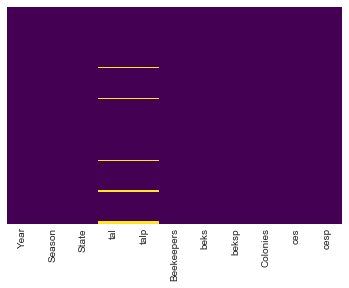

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

General exploratory analysis of dataframe

In [12]:
df.describe(include='all')


,Year,Season,State,tal,talp,Beekeepers,beks,beksp,Colonies,ces,cesp
count,365.000000,365,365,349.000000,349.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
unique,NaN,1,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Annual,Michigan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,365,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2013.989041,NaN,NaN,0.411450,41.144986,85.038356,0.854014,85.401370,37175.526027,0.400003,40.000274
std,2.002715,NaN,NaN,0.143868,14.386808,107.269526,0.205144,20.514442,86769.745718,0.390924,39.092437
min,2011.000000,NaN,NaN,0.075000,7.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2012.000000,NaN,NaN,0.314000,31.400000,21.000000,0.838000,83.800000,952.000000,0.032000,3.200000
50%,2014.000000,NaN,NaN,0.398000,39.800000,53.000000,0.929000,92.900000,4799.000000,0.207000,20.700000
75%,2016.000000,NaN,NaN,0.485000,48.500000,112.000000,0.969000,96.900000,33093.000000,0.828000,82.800000


Noteable statistics: 

Total_Annual_Loss_percentage range: 7.5% to 86.9% with a std of 14.38% - mean 39.8% 
    - A mean of 39.8% for total annual loss is very high for a national statistic over a 7-year period. 
    
Beekeepers range: 1.0 to 828.0 with a std of 107.26 - 85.03
    - High standard deviation 107.26 may suggest high variability in beekeepers across the United States. 
    
Beekeepers_Exclusive_to_state_percentage range: 0.0 % to 100.00% with std of 20.5 - mean 85.4%
    - A high mean of 85.4% suggests that majority of states have beekeepers exclusive to their state. 
    
Colonies range: 1.00 to 625897.00 with a std of 86769.745718 - mean 37175.526027
    - This is an extremely high standard deviation of 86769.745 for honey bee colonies. This suggests that there is a very uneven distribution of honey bee colonies throughout the United States. 
    
Colonies_Exclusive_to_State_percentage range: 0.00 to 100.00% with a std of 39.09% - mean 40.0% 
    - Only a mean 40.0% of colonies are exclusive to there state. Meaning that 60.0% of honey bee colonies are transported to other states during growing seasons to aid with pollination. 

Question 1:
States with 95% beekeepers exclusive to state have lower total annual colony loss? 

In order to answer this question we first need to use the groupby method in pandas and sort the values by State. Once we have used groupby and sort to arrange the dataframe we can then use a Seaborn barplot to display the data. 

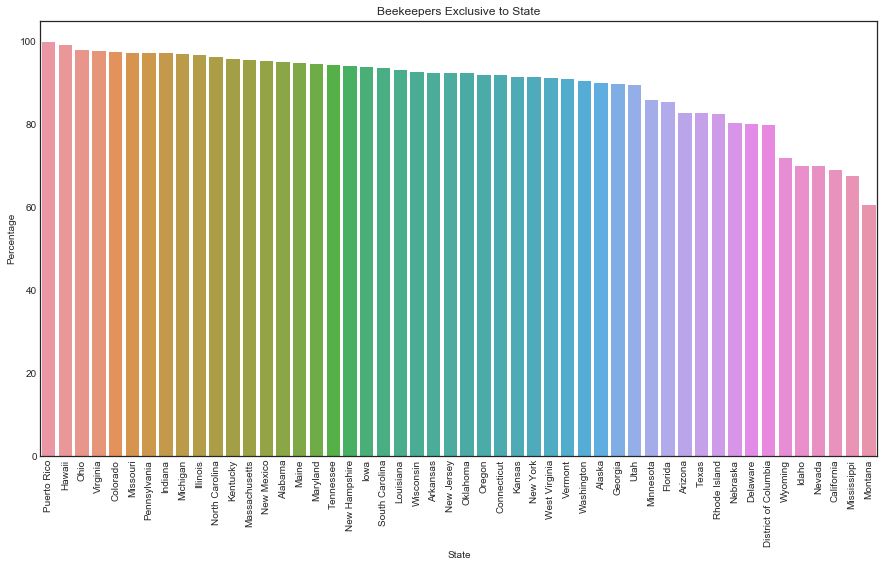

In [13]:
state_col = df[['State','beksp']].groupby(['State']).mean()
state_col = state_col['beksp'].sort_values(ascending=False)[:50]

state_col_keys = state_col.index
state_col_val = state_col.values

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x = state_col_keys,y =state_col_val)

plt.title('Beekeepers Exclusive to State')
plt.ylabel('Percentage')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Our initial Seaborn barplot above does show a significant number of states with beekeepers exclusive to states above 95%. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266B214FB38>,
      dtype=object)

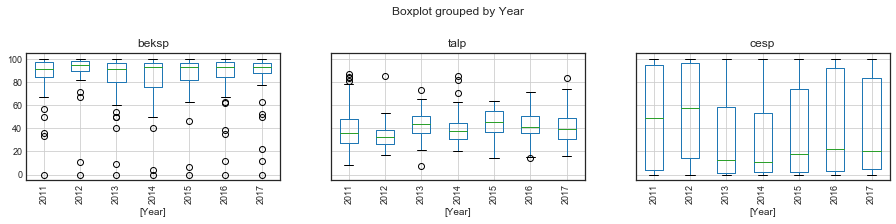

In [14]:
df.boxplot(column=['beksp', 'talp', 
                   'cesp'], by=['Year'], layout = (3,3), rot=90, fontsize=9, figsize=(15,8))

#beksp - beekeepers exclusive to state percentage
#cesp - colonies exclusive to state percentage
#talp - total annual loss percentage 

#beksp - beekeepers exclusive to state percentage
#cesp - colonies exclusive to state percentage
#talp - total annual loss percentage 

In the non-sorted dataframe it is unclear if beekeepers exclusive to state percentage (beksp) will have an effect on the total annual loss (talp). 

In [15]:
bk = df[df['beksp'] > 95]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266B2BDD7F0>,
      dtype=object)

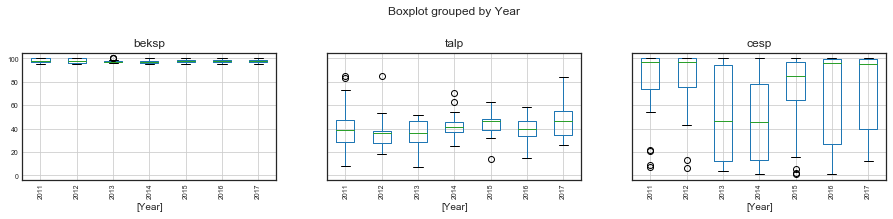

In [16]:
bk.boxplot(column=['beksp', 'talp', 'cesp'], by=['Year'], layout = (3,3), rot=90, fontsize=7, figsize=(15,8))

Above is the figure of beekeepers exclusive to state (beksp) is sorted to 95%. The total annual loss percentage (talp) is only slightly lower then the orginal dataframe. However, the colonies exclusive to state (cesp) the mean per year were significantly higher. 

Total Annual Loss Percent 
Orginal DF: 39.8%
Sorted > 95% bk: 40.6% 
Sorted < 95% bke: 39.7 % 

The higher percentage of beekeepers exclusive to state > 95% has little effect on the total annual loss percentage. Even with states that have higher percentage of beekeepers tending to the honey bee colonies this has little effect on countering the total annual colony losses. 

In [17]:
bk.describe()

,Year,tal,talp,Beekeepers,beks,beksp,Colonies,ces,cesp
count,140.000000,128.000000,128.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,2013.892857,0.413938,41.393750,127.185714,0.977207,97.720714,7765.971429,0.684707,68.470714
std,1.995305,0.144589,14.458862,151.521520,0.015307,1.530670,14438.953040,0.364914,36.491360
min,2011.000000,0.075000,7.500000,1.000000,0.951000,95.100000,1.000000,0.013000,1.300000
25%,2012.000000,0.333500,33.350000,29.750000,0.964750,96.475000,764.000000,0.262000,26.200000
50%,2014.000000,0.406500,40.650000,77.000000,0.975000,97.500000,1858.000000,0.907000,90.700000
75%,2016.000000,0.480000,48.000000,165.000000,0.987000,98.700000,6740.500000,0.996250,99.625000
max,2017.000000,0.853000,85.300000,828.000000,1.000000,100.000000,84676.000000,1.000000,100.000000


In [18]:
bke = df[df['beksp'] < 95]


In [19]:
bke.describe()

,Year,tal,talp,Beekeepers,beks,beksp,Colonies,ces,cesp
count,219.000000,215.000000,215.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2014.073059,0.410935,41.093488,57.853881,0.772630,77.263014,56502.840183,0.223288,22.328767
std,2.016936,0.144221,14.422145,51.105814,0.231227,23.122715,107201.839289,0.292216,29.221606
min,2011.000000,0.139000,13.900000,2.000000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,2012.000000,0.303500,30.350000,16.500000,0.727000,72.700000,1199.000000,0.011500,1.150000
50%,2014.000000,0.397000,39.700000,43.000000,0.868000,86.800000,16311.000000,0.080000,8.000000
75%,2016.000000,0.492000,49.200000,80.000000,0.917000,91.700000,54925.500000,0.337000,33.700000
max,2017.000000,0.869000,86.900000,253.000000,0.948000,94.800000,625897.000000,1.000000,100.000000


First 3 plots, Orginal Dataframe
Second 3 plots, Sorted Dataframe >95%
Third 3 plots, Sorted Dataframe <95%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266B4480438>,
      dtype=object)

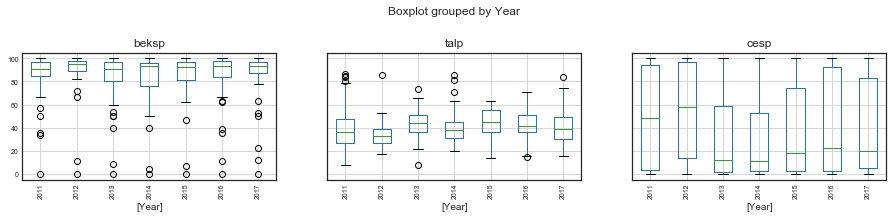

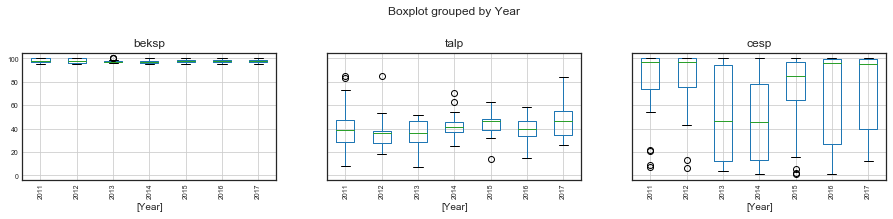

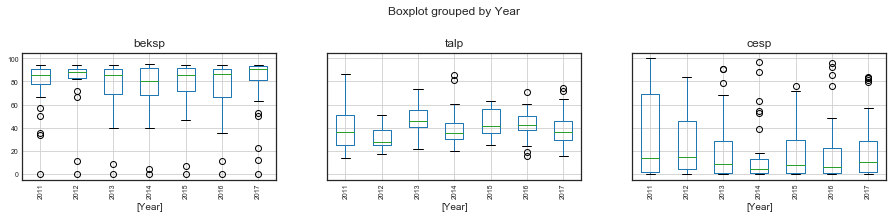

In [20]:
print("First 3 plots, Orginal Dataframe")
print("Second 3 plots, Sorted Dataframe >95%")
print("Third 3 plots, Sorted Dataframe <95%")


df.boxplot(column=['beksp', 'talp', 'cesp'], by=['Year'], layout = (3,3), rot=90, fontsize=7, figsize=(15,8))
bk.boxplot(column=['beksp', 'talp', 'cesp'], by=['Year'], layout = (3,3), rot=90, fontsize=7, figsize=(15,8))
bke.boxplot(column=['beksp', 'talp', 'cesp'], by=['Year'], layout = (3,3), rot=90, fontsize=7, figsize=(15,8))

No relationship between beekeepers exclusive to states and total annual colony loss. There is an relationship between beekeepers exclusive to state (beksp) and colonies exclusive to state (cesp). Higher beks percentage the higher ces percentage. Suggesting that beekeepers exclusive to states may also manage the colonies exclusive to states. 

Question 2: What percentage of honey bee colonies are tranported to other states annually, and what are the top 10 states in exporting honey bee colonies?

In order to answer question 2. I first started by plotting a violinplot with seaborn to find the distribution of Colonies (counts) by year.  

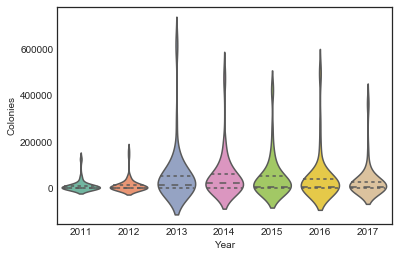

In [31]:
ax = sns.violinplot(x="Year", y="Colonies",data=df, 
                    palette="Set2", split=True,
                    scale="count", inner="quartile")

Next, I created new variables in order to quantify the percentage of honey bee colonies transported. 

The following variables were created: 
    
    1. Colonies Exclusive to State (ces) * Colonies = Number of colonies exclusive to state in count value (ces_col)
    2. Colonies - Number of colonies exclusive to state in count value (ces_col) = Colonies transported out of state (trans_col)
    3. (Colonies transported out of state (trans_col) / Colonies) * 100 = Percentage Colonies transported out of state (trans_col_per)

In [85]:
df['ces_col'] = ces_col
df

ces_col = (df['ces'])*(df['Colonies'])
#ces_col

#ces_col: colonies exclusive to state colony counts 

In [82]:
df['trans_col'] = trans_col
df

trans_col = (df['Colonies'])-(df['ces_col'])
#trans_col

#trans_col: colonies transported out of state

In [98]:
df['trans_col_per'] = trans_col_per
df

trans_col_per = (df['trans_col'])/(df['Colonies'])*100
#trans_col_per

#trans_col_per: Percent of colonies transported 

Here are the added columns with in the updated dataframe. 

In [99]:
df.head()

,Year,Season,State,tal,talp,Beekeepers,beks,beksp,Colonies,ces,cesp,ces_col,trans_col,trans_col_per
0,2017,Annual,Massachusetts,0.159,15.9,87,0.943,94.3,27186,0.023,2.3,625.278,26560.722,97.7
1,2017,Annual,Montana,0.171,17.1,21,0.524,52.4,35905,0.003,0.3,107.715,35797.285,99.7
2,2017,Annual,Nevada,0.230,23.0,13,0.923,92.3,2512,0.052,5.2,130.624,2381.376,94.8
3,2017,Annual,Maine,0.233,23.3,65,0.938,93.8,41102,0.014,1.4,575.428,40526.572,98.6
4,2017,Annual,Wyoming,0.234,23.4,18,0.778,77.8,6521,0.014,1.4,91.294,6429.706,98.6


Barplot of percent of colonies transported out of state.

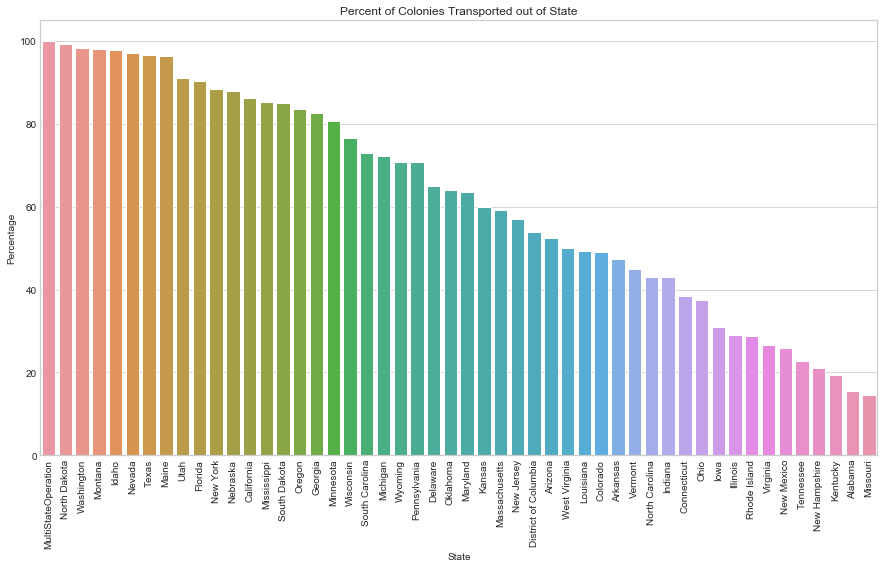

In [112]:
state_col = df[['State','trans_col_per']].groupby(['State']).mean()
state_col = state_col['trans_col_per'].sort_values(ascending=False)[:50]

state_col_keys = state_col.index
state_col_val = state_col.values

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x = state_col_keys,y =state_col_val)

plt.title('Percent of Colonies Transported out of State')
plt.ylabel('Percentage')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Comparing boxplots of total annual loss percentage and colonies transported percentage. A couple things are worth noting...
1. Since 2013 there is a very significant increase in the amount of colonies transported out of state. This coincides with a slight increase in the total annual colony loss. 
2. See below, the is a very weak correlation (method: pearson) between total annual colony loss (talp) and colonies transported out of state (trans_col_per). 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266C8C63B38>,
      dtype=object)

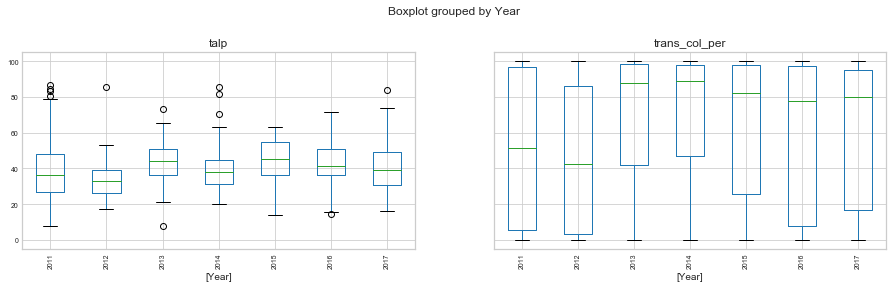

In [102]:
df.boxplot(column=['talp', 'trans_col_per'], by=['Year'], layout = (2,2), rot=90, fontsize=7, figsize=(15,8))


In [189]:
df_corr = df[['talp','trans_col_per']]
correlation = df_corr.corr(method='pearson')
correlation

,talp,trans_col_per
talp,1.000000,-0.040362
trans_col_per,-0.040362,1.000000


Barplot of just 2013 (year) when there was a huge jump in the colonies transported out state percentage (trans_col_per). 

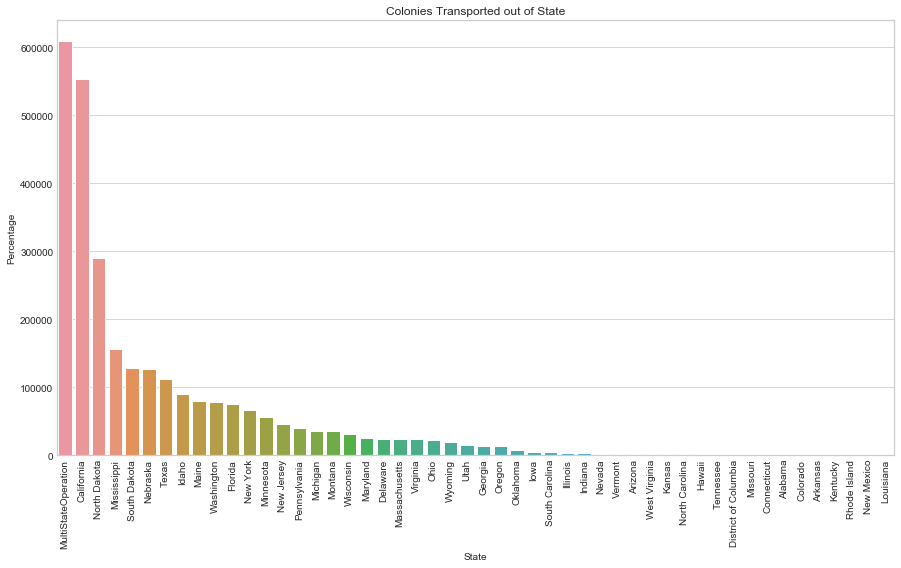

In [145]:
state_col = yr[['State','trans_col']].groupby(['State']).mean()
state_col = state_col['trans_col'].sort_values(ascending=False)[:50]

state_col_keys = state_col.index
state_col_val = state_col.values

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x = state_col_keys,y =state_col_val)

plt.title('Colonies Transported out of State')
plt.ylabel('Percentage')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Honey bee colonies shipped from all over the United States to California for Almond harvest. 
https://www.npr.org/2017/03/09/519500033/bees-travel-cross-country-for-the-california-almond-harvest

When the dataframe is groupby Year and using get_group(2013). The scatter plot between total annual colony loss (talp) and colonies transported out of state percentage (trans_col_per) show no clear relationship. 

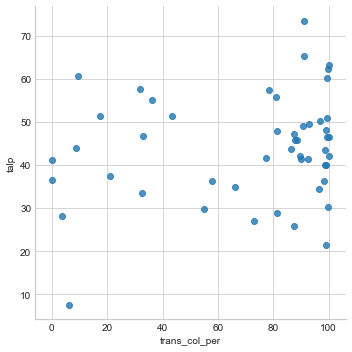

In [177]:
yr = df.groupby(['Year']).get_group(2013)
yr


sns.lmplot( x="trans_col_per", y="talp", data=yr, fit_reg=False)


#yr.boxplot(column=['talp', 'trans_col_per'], by=['State'], layout = (2,2), rot=90, fontsize=7, figsize=(15,8))

# sns.lmplot('talp','trans_col_per',data=yr, hue='State',
#            palette='coolwarm',size=6,aspect=1,fit_reg=False)

#sns.regplot(x=yr["trans_col_per"], y=yr["talp"], fit_reg=False)
#sns.jointplot(x='trans_col_per',y='talp',data=yr,kind='reg')



Question 3. Is the t-statistic more significant between Colonies and colonies transported out of state? 

In [203]:

print('Mean Colonies:', df['Colonies'].mean())
print('Mean trans_col:', df['trans_col'].mean())
print('-------')
print('Std Colonies:', df['Colonies'].std())
print('Std trans_col:', df['trans_col'].std())

Mean Colonies: 37175.52602739726
Mean trans_col: 34815.12358356165
-------
Std Colonies: 86769.74571760808
Std trans_col: 83315.97715783949


In [204]:
diff=df['trans_col'].mean( ) -df['Colonies'].mean()
print('Difference in Means between Colonies and trans_col:', diff)

Difference in Means between Colonies and trans_col: -2360.4024438356064


In [205]:
size = np.array([len(df['Colonies']), len(df['trans_col'])])
sd = np.array([df['Colonies'].std(), df['trans_col'].std()])

diff_se = (sum(sd ** 2 / size)) ** 0.5  

print('Difference in means divided by std error - T-Value:', diff/diff_se)

Difference in means divided by std error - T-Value: -0.37487813138219406


In [206]:
from scipy.stats import ttest_ind
print('T-statistic and p-value for the 2 sample populations:', ttest_ind(df['trans_col'], df['Colonies'], equal_var=False))
#null hypothesis the means are the same
#alternate hypothesis means are difference 
# p-value the difference between observed means
# p-value what is the probability of see the difference of the means were true this a relatively rare event. 
# Reject Null 
# 95 times out of 100 we don't reject the null 
# Statistical significance - statement would happen very infrequently 

T-statistic and p-value for the 2 sample populations: Ttest_indResult(statistic=-0.3748781313821965, pvalue=0.7078604644719053)


The t-statistic of 0.3748781313821965 does not fall within a 95% confidence interval. 

There is not a significant difference between Colonies and Colonies transported. Accept the Null Hypothesis Ho because the the p value is 0.707. 

There is not a significant difference between in the means for the variables Colonies and colonies transported out of state (trans_col). 